#Ситник Вероника Федоровна
## КБ-221

Производственная функция: Y = 0.00 * K^-0.04 * L^1.33
R-квадрат: 0.9633


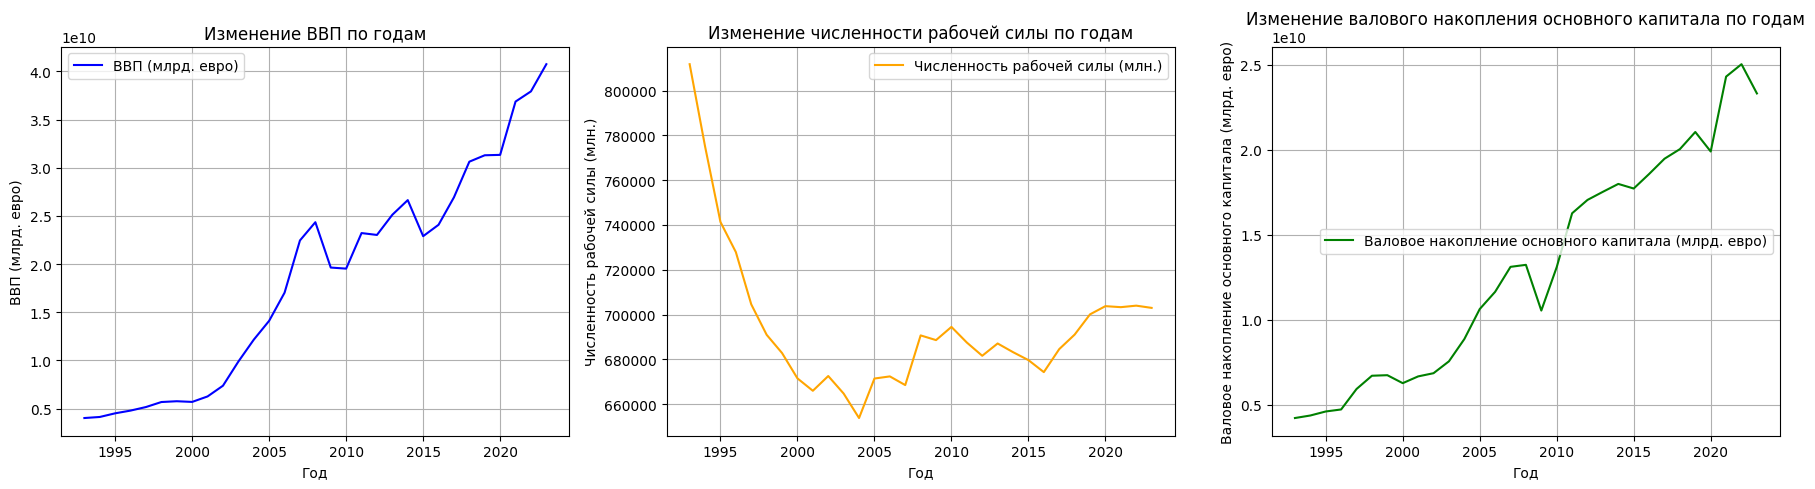

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def estimate_cobb_douglas(filepath, sheet_name='DATA'):
    """Оценивает производственную функцию Кобба-Дугласа из данных Excel.

    Args:
        filepath: Путь к файлу Excel.
        sheet_name: Имя листа, содержащего данные.

    Returns:
        Кортеж, содержащий:
            - Оцененную производственную функцию Кобба-Дугласа (строка).
            - Значение R-квадрат модели.
            - Объект matplotlib figure.

        Возвращает None, если во время обработки возникли ошибки.
    """
    try:
        data = pd.read_excel(filepath, sheet_name=sheet_name)
        if 'Year' not in data.columns or 'GDP' not in data.columns or 'Labor Force' not in data.columns or 'Gross Fixed Capital Formation' not in data.columns:
            raise ValueError("Ошибка: Необходимые столбцы ('Year', 'GDP', 'Labor Force', 'Gross Fixed Capital Formation') не найдены в данных.")

        Y = np.log(data['GDP'])
        L = np.log(data['Labor Force'])
        K = np.log(data['Gross Fixed Capital Formation'])

        X = np.column_stack((np.ones(len(Y)), L, K))

        model = LinearRegression()
        model.fit(X, Y)

        alpha = model.coef_[1]
        beta = model.coef_[2]
        A = np.exp(model.intercept_)
        r2 = r2_score(Y, model.predict(X))

        production_function = f"Производственная функция: Y = {A:.2f} * K^{alpha:.2f} * L^{beta:.2f}"

        print(production_function)
        print(f"R-квадрат: {r2:.4f}")

        # Построение графиков
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        axes[0].plot(data['Year'], data['GDP'], label='ВВП (млрд. евро)', color='blue')
        axes[0].set_xlabel('Год')
        axes[0].set_ylabel('ВВП (млрд. евро)')
        axes[0].set_title('Изменение ВВП по годам')
        axes[0].legend()  # Добавлена легенда
        axes[0].grid(True)

        axes[1].plot(data['Year'], data['Labor Force'], label='Численность рабочей силы (млн.)', color='orange')
        axes[1].set_xlabel('Год')
        axes[1].set_ylabel('Численность рабочей силы (млн.)')
        axes[1].set_title('Изменение численности рабочей силы по годам')
        axes[1].legend()  # Добавлена легенда
        axes[1].grid(True)

        axes[2].plot(data['Year'], data['Gross Fixed Capital Formation'], label='Валовое накопление основного капитала (млрд. евро)', color='green')
        axes[2].set_xlabel('Год')
        axes[2].set_ylabel('Валовое накопление основного капитала (млрд. евро)')
        axes[2].set_title('Изменение валового накопления основного капитала по годам')
        axes[2].legend()  # Добавлена легенда
        axes[2].grid(True)

        plt.tight_layout()
        return production_function, r2, fig
    except FileNotFoundError:
        print(f"Ошибка: Файл не найден по пути: {filepath}")
        return None
    except ValueError as e:
        print(f"Ошибка: {e}")
        return None


# Пример использования:
filepath = 'Estonia1.xlsx'

production_function, r2, fig = estimate_cobb_douglas(filepath)

if fig is not None:
    plt.show()  # Отобразить график



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel
data = pd.read_excel('Estonia1.xlsx', sheet_name='DATA')

# Проверка наличия столбца 'Year'
if 'Year' not in data.columns:
    raise ValueError("Ошибка: Столбец 'Year' не найден в данных.")

# Логарифмируем данные
Y = np.log(data['GDP'])
L = np.log(data['Labor Force'])
K = np.log(data['Gross Fixed Capital Formation'])

# Создание матрицы признаков
X = np.column_stack((np.ones(len(Y)), L, K))

# Обучение модели
model = LinearRegression()
model.fit(X, Y)

# Извлечение коэффициентов
alpha = model.coef_[1]
beta = model.coef_[2]
A = np.exp(model.intercept_)

# Расчет средних показателей производительности
avg_labor_productivity = np.mean(data['GDP'] / data['Labor Force'])
avg_capital_productivity = np.mean(data['GDP'] / data['Gross Fixed Capital Formation'])

# Функции для предельной производительности
def marginal_productivity_labor(K, L):
    return A * alpha * (K**alpha) * (L**(beta - 1))

def marginal_productivity_capital(K, L):
    return A * beta * (K**(alpha - 1)) * (L**beta)

# Средние значения капитала и труда
mean_K = np.mean(data['Gross Fixed Capital Formation'])
mean_L = np.mean(data['Labor Force'])

# Расчет предельной производительности
mpl = marginal_productivity_labor(mean_K, mean_L)
mpc = marginal_productivity_capital(mean_K, mean_L)

# Эластичности
elasticity_labor = alpha
elasticity_capital = beta

# Предельная норма замещения труда капиталом
mrs_lk = mpl / mpc

# Эластичность замещения
sigma = 1  # Эластичность замещения

# Вывод результатов
print(f"Средняя производительность труда: {avg_labor_productivity:.2f}")
print(f"Средняя производительность капитала: {avg_capital_productivity:.2f}")
print(f"Предельная производительность труда (по средним): {mpl:.2f}")
print(f"Предельная производительность капитала (по средним): {mpc:.2f}")
print(f"Эластичность выпуска по труду: {elasticity_labor:.2f}")
print(f"Эластичность выпуска по капиталу: {elasticity_capital:.2f}")
print(f"Предельная норма замещения труда капиталом (по средним): {mrs_lk:.2f}")
print(f"Эластичность замещения: {sigma:.2f}")

Средняя производительность труда: 26788.49
Средняя производительность капитала: 1.31
Предельная производительность труда (по средним): -0.00
Предельная производительность капитала (по средним): 0.00
Эластичность выпуска по труду: -0.04
Эластичность выпуска по капиталу: 1.33
Предельная норма замещения труда капиталом (по средним): -607.37
Эластичность замещения: 1.00


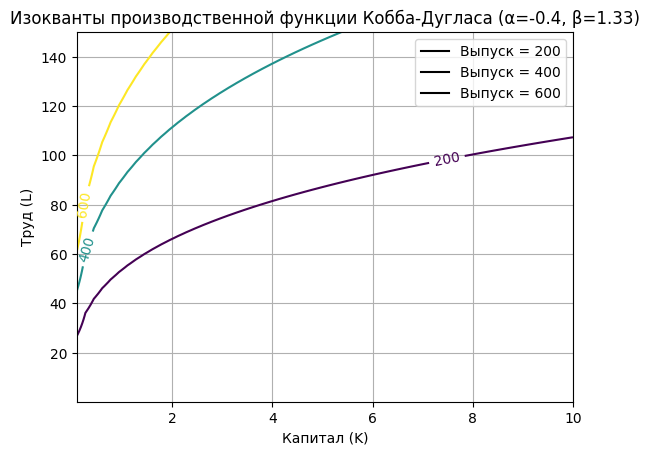

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Определение параметров функции Кобба-Дугласа с проверкой значений
A = 1
alpha = -0.4
beta = 1.33

if A <= 0:
    raise ValueError("A должно быть положительным")
# Можно добавить проверки для alpha и beta, если это необходимо, например:
# if abs(alpha) > 10 or abs(beta) > 10: raise ValueError("alpha и beta слишком крайние")

# Определение функции Кобба-Дугласа с обработкой ошибок
def cobb_douglas(K, L, A, alpha, beta):
    K = np.clip(K, 1e-6, np.inf)  # Избегаем проблем с K=0 или отрицательным K
    L = np.clip(L, 1e-6, np.inf)  # Избегаем проблем с L=0 или отрицательным L
    return A * (K**alpha) * (L**beta)

# Генерация диапазонов капитала и труда
K_range = np.linspace(0.1, 10, 60)  # Начинаем K с небольшого положительного числа
L_range = np.linspace(0.1, 150, 100)  # Начинаем L с небольшого положительного числа
K, L = np.meshgrid(K_range, L_range)

# Определение уровней производства (изоквант)
output_levels = [200, 400, 600]

# Построение изоквант
output = cobb_douglas(K, L, A, alpha, beta)
cs = plt.contour(K, L, output, levels=output_levels)
plt.clabel(cs, inline=1, fontsize=10)

# Добавление легенды (это важно!)
handlers = [plt.Line2D([0], [0], color='black', label=f'Выпуск = {level}') for level in output_levels]
plt.legend(handles=handlers)

# Настройка графика
plt.xlabel('Капитал (K)')
plt.ylabel('Труд (L)')
plt.title('Изокванты производственной функции Кобба-Дугласа (α=-0.4, β=1.33)')  # добавлены значения alpha и beta в заголовок
plt.grid(True)
plt.show()
